# `GRIP @The Sparks Foundation`

## <U>Prediction Using Decision Tree Algorithm<U>

#### Importing the requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the CSV file

In [2]:
df = pd.read_csv(r"iris_dt.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Dropping off the irrelevant columns

In [4]:
df.drop('Id',axis=1,inplace = True)

#### Checking the null values if any

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking the duplicate values if any

In [6]:
df.duplicated().sum()

3

#### Dropping off the duplicated values

In [7]:
df = df.drop_duplicates()

### Exploratory Data Analysis 

#### It shows how the input variable are corelated with eachother and also shows their distribution

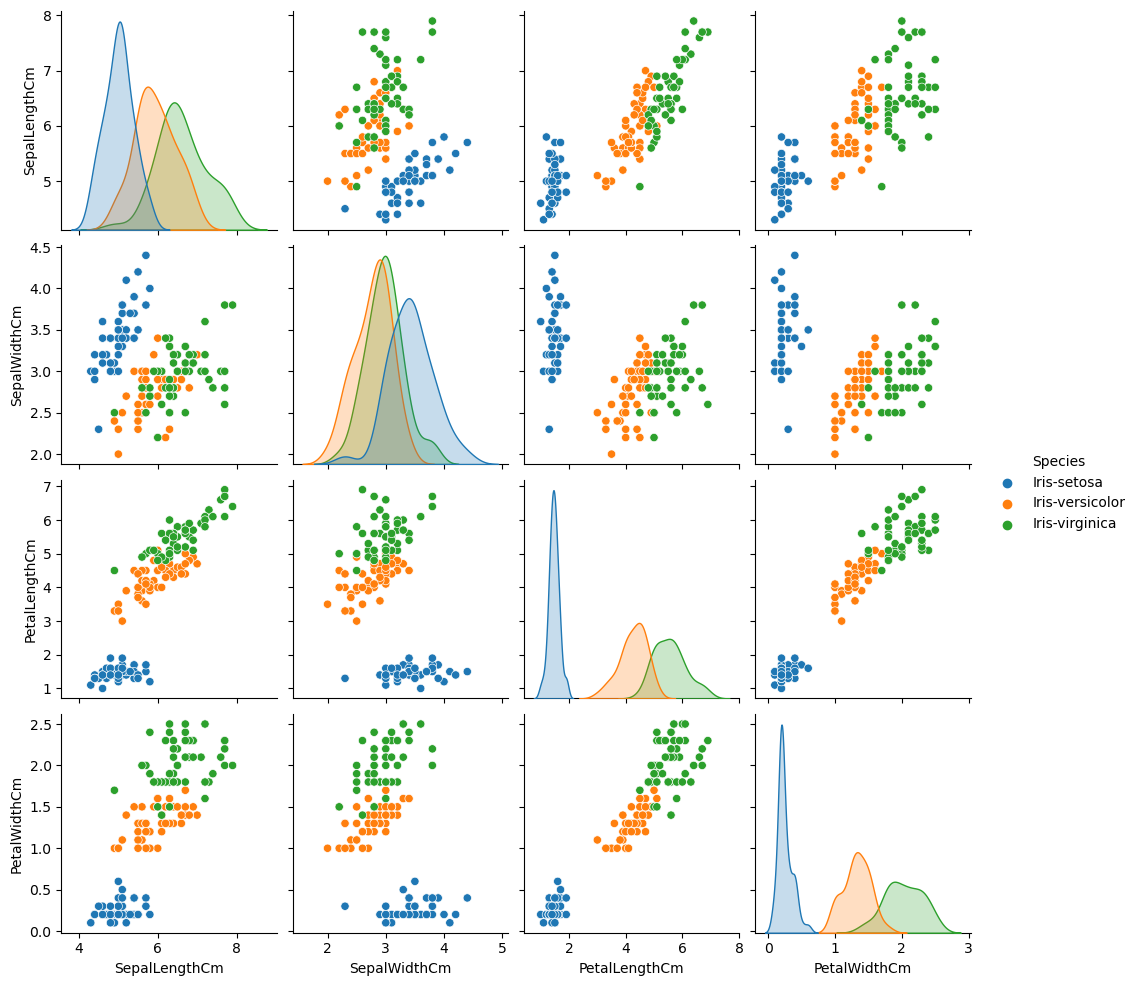

In [8]:
sns.pairplot(df,hue = 'Species')
plt.show()

#### Correlation among input variables

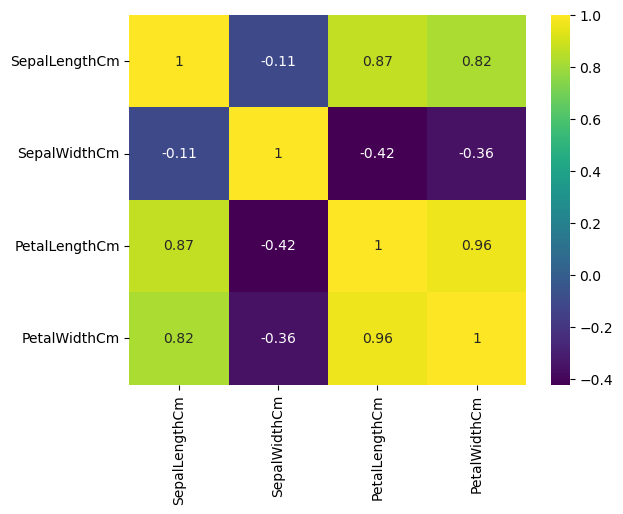

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

### Building the model

#### Importing the necessary function of SciKit Learn

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Defining the Input and output variable

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Splitting the dataset into train and test dataset

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Creating the model object and then tuning its hyperparameters using GridSearchCV 

In [13]:
dt = DecisionTreeClassifier()

In [14]:
param = {'criterion':['gini','entropy'],'max_depth': [2, 4, 6, 8],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [15]:
grid = GridSearchCV(dt,param_grid = param,cv=5)

#### Training the model using train dataset

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

### Model Evaluation

#### Accuracy on train dataset

In [17]:
grid.best_score_

0.9576086956521739

#### Prediction on test dataset using trained model

In [18]:
y_pred = grid.predict(X_test)

#### Accuracy on test dataset

In [19]:
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9333333333333333


#### Classification Report

In [20]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Confusion Matrix

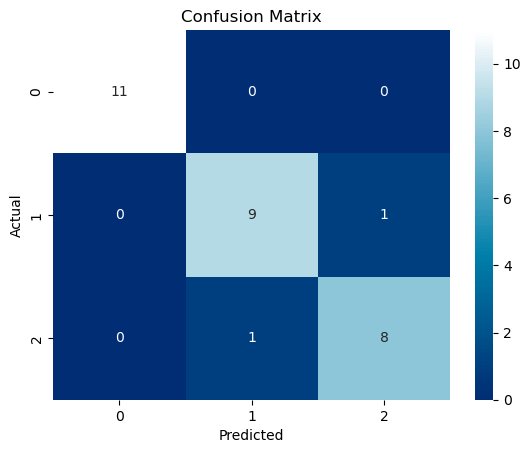

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,center=1,cmap='ocean')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()